In [1]:
#https://qastack.jp/stats/372634/boosting-and-bagging-trees-xgboost-lightgbm
    
#https://mathmatical22.xyz/2020/04/09/%E3%80%90%E5%88%9D%E5%AD%A6%E8%80%85%E5%90%91%E3%81%91%E3%80%91lightgbm-%E5%9F%BA%E6%9C%AC%E7%9A%84%E3%81%AA%E4%BD%BF%E3%81%84%E6%96%B9-%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90%E7%B7%A8%E3%80%90python/
    
#https://mathmatical22.xyz/2020/04/12/%E3%80%90%E5%88%9D%E5%BF%83%E8%80%85%E5%90%91%E3%81%91%E3%80%91%E7%89%B9%E5%BE%B4%E9%87%8F%E9%87%8D%E8%A6%81%E5%BA%A6%E3%81%AE%E7%AE%97%E5%87%BA-lightgbm-%E3%80%90python%E3%80%91%E3%80%90%E6%A9%9F/

ModuleNotFoundError: No module named 'lightgbm'

In [1]:
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.model_selection import KFold

import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib  inline

In [2]:
train =  pd.read_csv('trainofbike.csv',  parse_dates = ['datetime'])
test = pd.read_csv('testofbike.csv', parse_dates = ['datetime'])

In [8]:
#datetimeの変換
import datetime as dt
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['weekday'] = train.datetime.dt.weekday
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
test['day'] = test.datetime.dt.day
test['hour'] = test.datetime.dt.hour
test['weekday'] = test.datetime.dt.weekday
test['year'] = test.datetime.dt.year
test['month'] = test.datetime.dt.month

In [14]:
train[train['count']>700]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,weekday,year,month
6611,2012-03-12 18:00:00,1,0,1,2,24.60,31.06,43,12.9980,89,623,712,12,18,0,2012,3
6635,2012-03-13 18:00:00,1,0,1,1,28.70,31.82,34,19.9995,96,638,734,13,18,1,2012,3
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.82,28,6.0032,140,642,782,14,17,2,2012,3
6659,2012-03-14 18:00:00,1,0,1,1,28.70,31.82,32,0.0000,102,647,749,14,18,2,2012,3
6682,2012-03-15 17:00:00,1,0,1,1,28.70,31.82,39,16.9979,79,634,713,15,17,3,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10510,2012-12-04 08:00:00,4,0,1,2,18.04,21.97,88,11.0014,21,700,721,4,8,1,2012,12
10519,2012-12-04 17:00:00,4,0,1,1,21.32,25.00,59,15.0013,43,700,743,4,17,1,2012,12
10520,2012-12-04 18:00:00,4,0,1,1,20.50,24.24,63,15.0013,38,693,731,4,18,1,2012,12
10534,2012-12-05 08:00:00,4,0,1,2,18.04,21.97,58,19.0012,22,737,759,5,8,2,2012,12


In [4]:
# 2.ベース(datetime分解あり)
train_0 = train.drop(columns = ['datetime', 'casual', 'registered', 'count'])
train_y = train['count']
test_0 = test.drop(columns = ['datetime'])
test_datetime = test['datetime']

In [5]:
# 3.countの対数関数化(小さいほうによっているときに有効)
train_y_log = np.log1p(train_y + 1)

Fold:1
RMSLE: 0.4327526521680462
-13609.647155417355
13128.430702792808


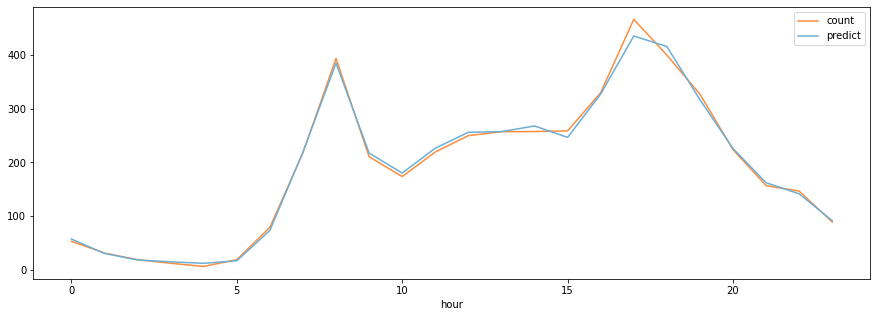

Fold:2
RMSLE: 0.4143172305318459
-13473.96980984084
12606.859405026564


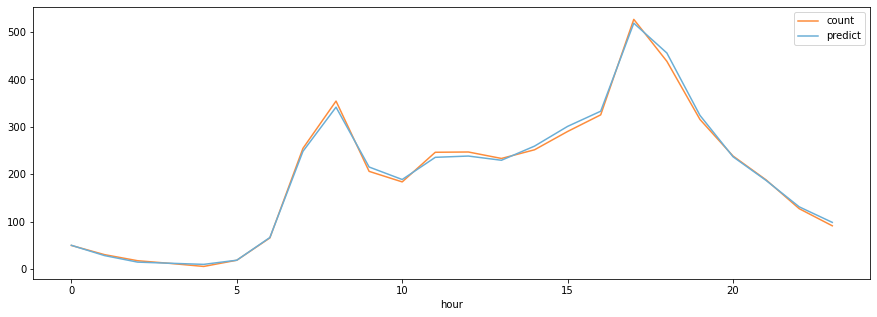

Fold:3
RMSLE: 0.4247826186867592
-11685.878181211498
12741.774160661618


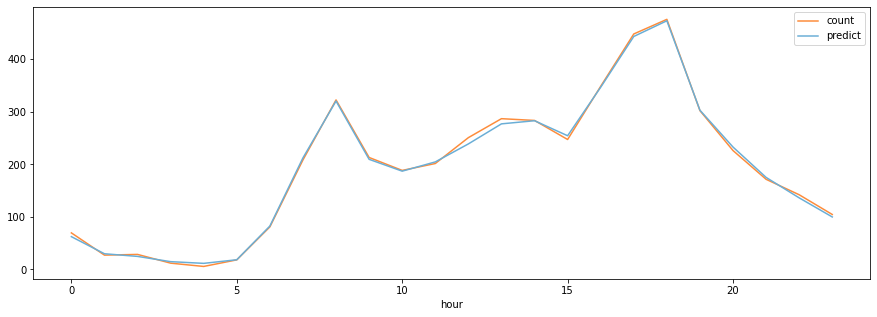

Fold:4
RMSLE: 0.441527910281859
-13299.658962072206
14339.870797320431


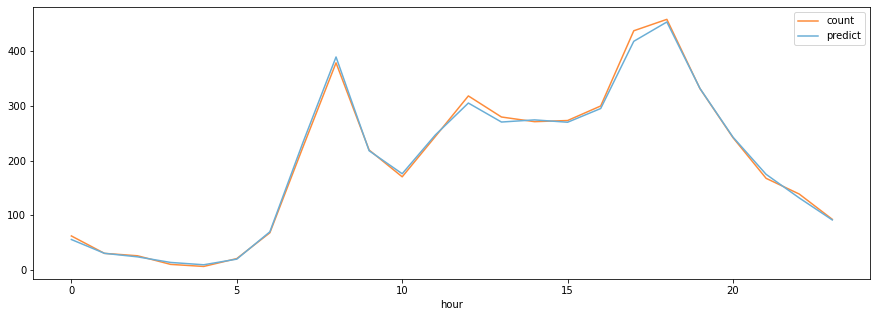

Fold:5
RMSLE: 0.4499582974460577
-13698.763539339603
13118.56250606622


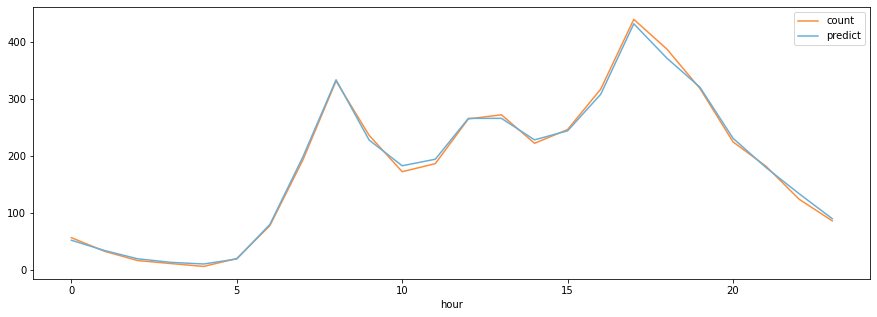

Fold:6
RMSLE: 0.4104927757327412
-14565.93917956489
12623.715515998829


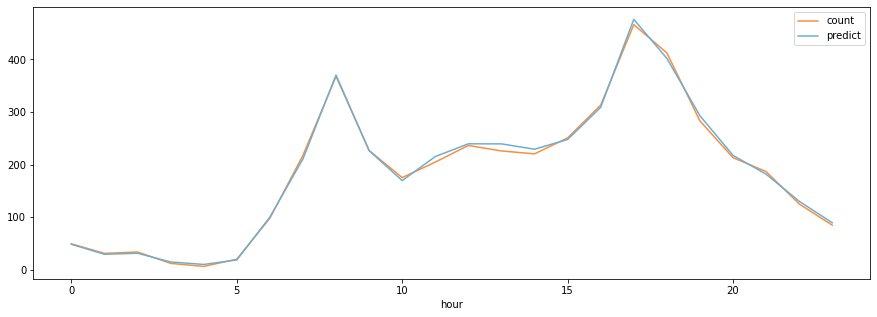

Fold:7
RMSLE: 0.40664545377886735
-13416.588772788084
12951.288722208808


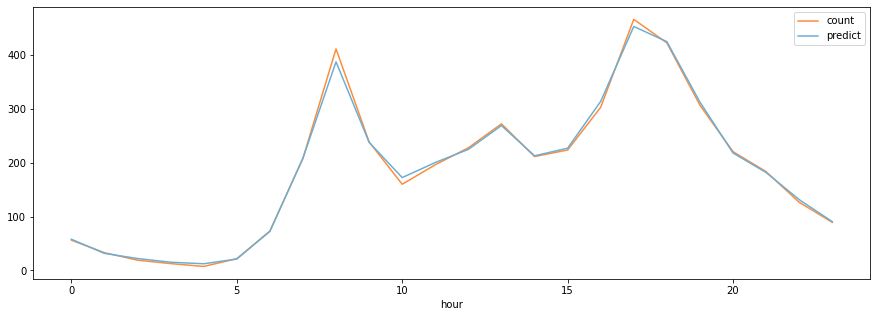

Fold:8
RMSLE: 0.45039551121529725
-12559.25825436257
13393.393176789834


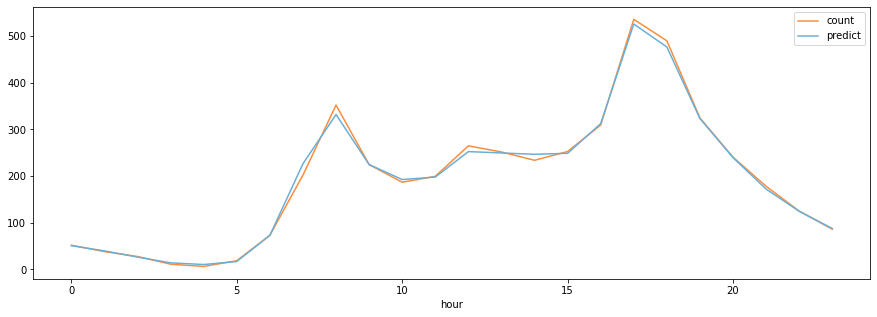

Fold:9
RMSLE: 0.4363286682091411
-14312.140651518308
12879.218343190147


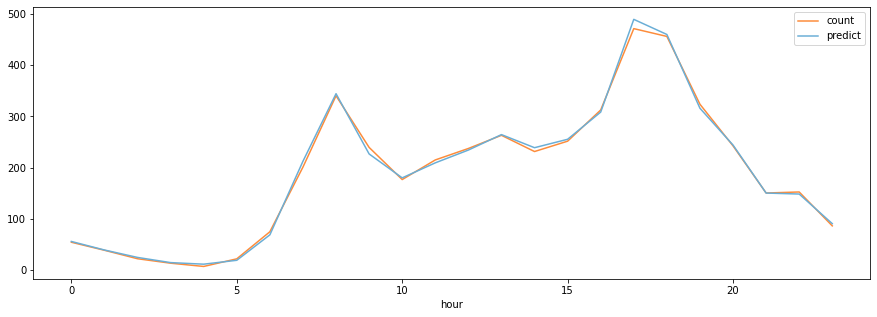

Fold:10
RMSLE: 0.4314813330925261
-12817.697160838132
12316.603622707356


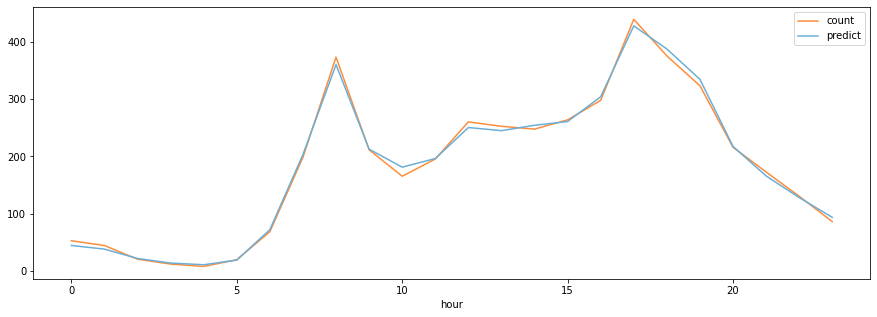

In [6]:
#デフォルト
#count
kf = KFold(n_splits=10, shuffle=True, random_state=1).split(train_0, train_y)
kf_ = list(kf)

cnt = 0
sum = 0
for Ktrain, Ktest in kf_:
    cnt += 1
    model = lgb.LGBMRegressor()
    model.fit(train_0.loc[Ktrain],
              train_y.loc[Ktrain],
              eval_set = [(train_0.loc[Ktest], train_y.loc[Ktest])],
              eval_metric = 'rmsle',                         #rmsleがない
              verbose=0)
 
    y_pred = model.predict(train_0.loc[Ktest])
    y_pred[y_pred < 0] = 0                                    #負の値が出てしまった。
    
    print(f"Fold:{cnt}")
    print('RMSLE:', np.sqrt(mean_squared_log_error(train_y.loc[Ktest], y_pred)))
    diff = train_y.loc[Ktest] - y_pred
    print(diff[diff<0].sum())
    print(diff[diff>0].sum())
    
    true_df = train.loc[Ktest][['count', 'hour']].groupby(['hour'], as_index = True).mean().sort_values(by = 'count')
    
    trainhour = train_0.loc[Ktest]['hour'].reset_index()
    pred_df = pd.concat([trainhour['hour'], pd.Series(y_pred)], axis=1)
    pred_df.columns = ['hour','predict']
    pred_df = pred_df.groupby(['hour'], as_index = True).mean().sort_values(by = 'predict')
    
    fig = plt.figure(figsize=(15,5))
    sns.lineplot(data=true_df, palette='Oranges')
    sns.lineplot(data=pred_df, palette='Blues')
    plt.show()

In [7]:
#パラメータチューニングの結果
kf = KFold(n_splits=10, shuffle=True, random_state=1).split(train_0, train_y)
kf_ = list(kf)

cnt = 0
sum = 0
for Ktrain, Ktest in kf_:
    cnt += 1
    model = lgb.LGBMRegressor(silent = False,
                              n_jobs = -1,
                              max_depth = 10,
                              min_child_weight = 5,           #2,3,4,5
                              #gamma = 0.4                    #gammaの項がない
                              subsample = 0.9,
                              colsample_bytree = 1.0,
                              reg_alpha = 100,
                              n_estimators = 1000,
                              reg_lambda = 0.1,
                              learning_rate = 0.1
                              )
    model.fit(train_0.loc[Ktrain],
              train_y.loc[Ktrain],
              early_stopping_rounds = 50,
              eval_set = [(train_0.loc[Ktest], train_y.loc[Ktest])],
              eval_metric = 'rmsle',                         
              verbose=0)
 
    y_pred = model.predict(train_0.loc[Ktest])
    y_pred[y_pred < 0] = 0                                    #負の値が出てしまった。
    
    print(f"Fold:{cnt}")
    print('RMSLE:', np.sqrt(mean_squared_log_error(train_y.loc[Ktest], y_pred)))
    diff = train_y.loc[Ktest] - y_pred
    print(diff[diff<0].sum())
    print(diff[diff>0].sum())

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 9797, number of used features: 13
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 191.004695
Fold:1
RMSLE: 0.41555572849012595
-12665.77236942883
12174.241542283196
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

Fold:10
RMSLE: 0.4378308681348092
-11222.364983255104
11412.131558280882


Fold:1
RMSLE: 0.29899644548944626
-12025.417066100932
16638.690511068817


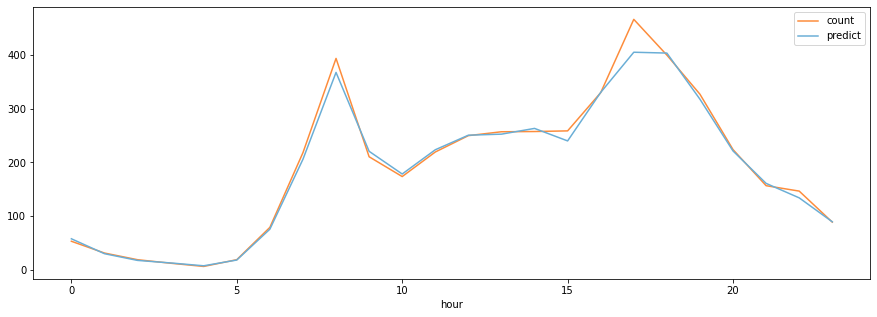

Fold:2
RMSLE: 0.29323627277329667
-12374.877608120201
15436.936476149456


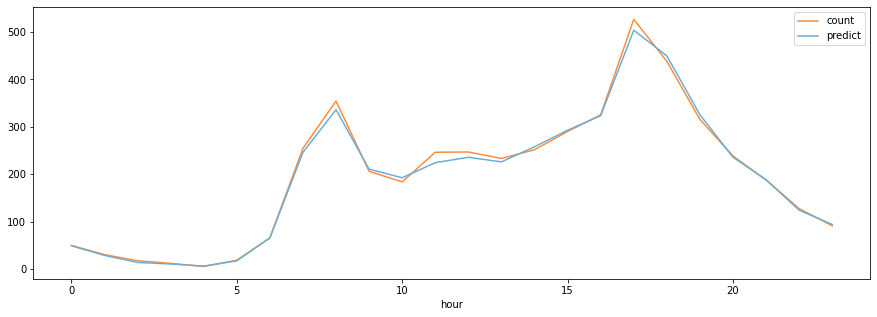

Fold:3
RMSLE: 0.27228388525776864
-10075.723699098222
16038.14406515511


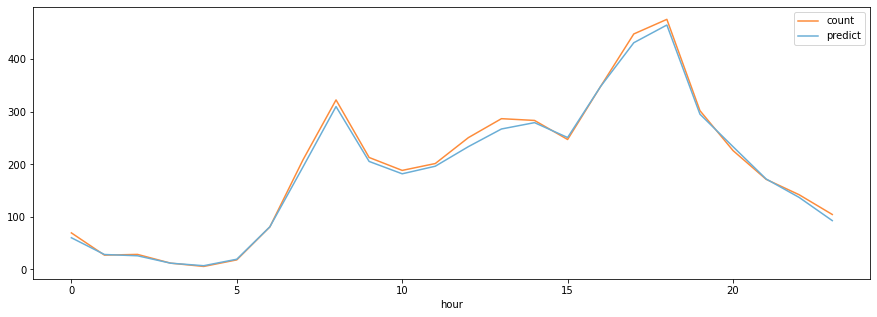

Fold:4
RMSLE: 0.3221185556221412
-11072.657372045644
17135.450348115406


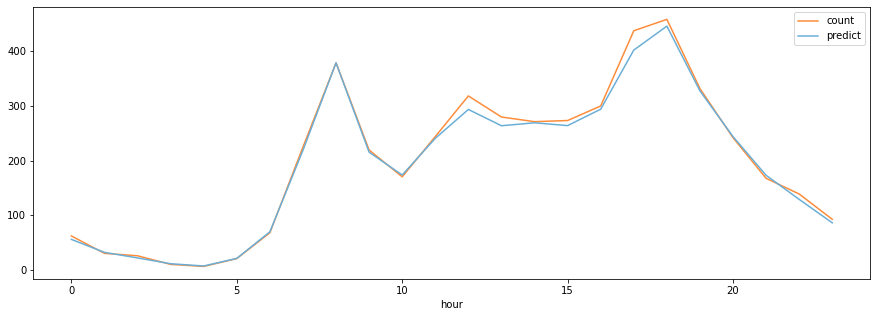

Fold:5
RMSLE: 0.29631226777996683
-10776.722654539704
15841.39326697679


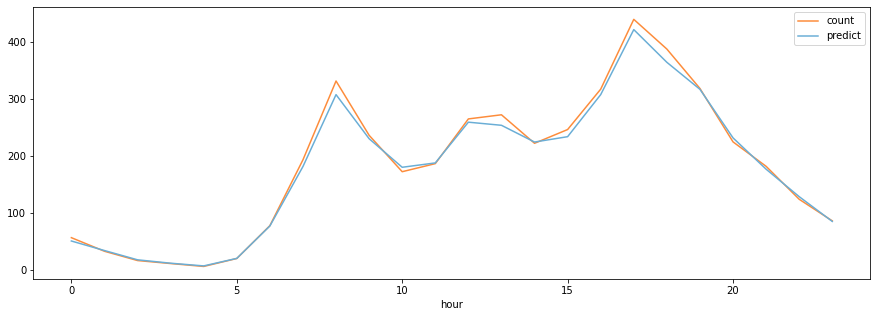

Fold:6
RMSLE: 0.28055298942624834
-11957.193004482651
15564.599888016019


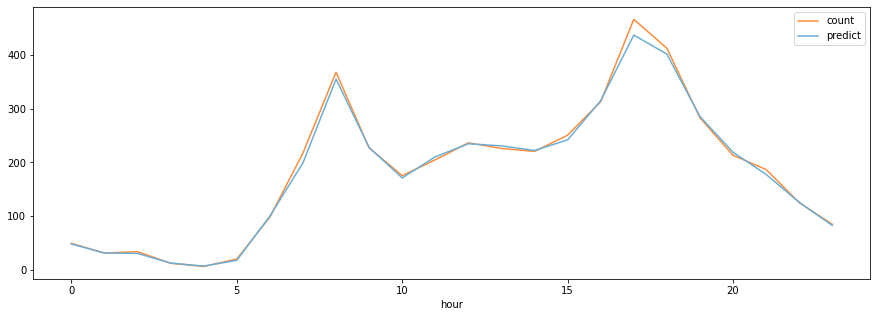

Fold:7
RMSLE: 0.2817302998358701
-11635.332723272375
16122.217816110824


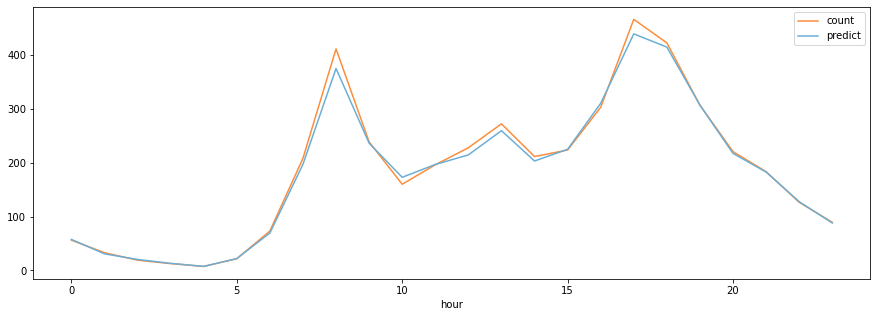

Fold:8
RMSLE: 0.2848283342103001
-11109.50628272317
15898.389656440675


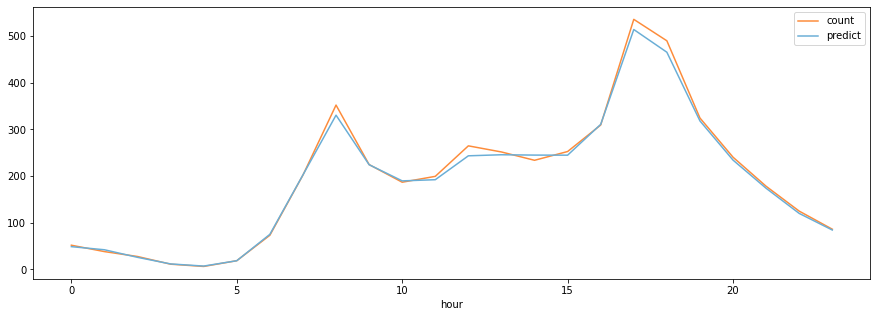

Fold:9
RMSLE: 0.30037815144846314
-11376.182477378745
15203.937618870652


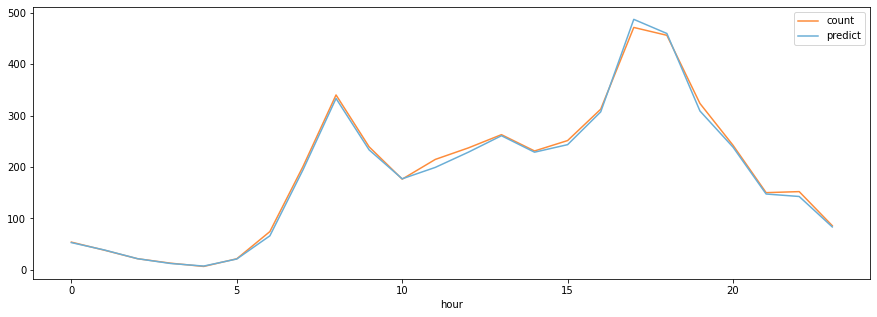

Fold:10
RMSLE: 0.30831963545577945
-10444.567888390651
14603.689810286129


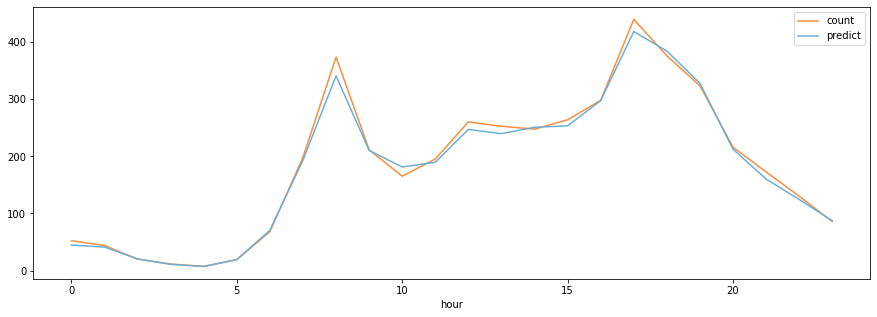

In [6]:
#count log
kf = KFold(n_splits=10, shuffle=True, random_state=1).split(train_0, train_y_log)
kf_ = list(kf)

cnt = 0
sum = 0
for Ktrain, Ktest in kf_:
    cnt += 1
    model = lgb.LGBMRegressor()
    model.fit(train_0.loc[Ktrain],
              train_y_log.loc[Ktrain],
              eval_set = [(train_0.loc[Ktest], train_y_log.loc[Ktest])],
              eval_metric = 'rmsle',                         
              verbose=0)
 
    y_pred_log = model.predict(train_0.loc[Ktest])
    y_pred = np.exp(y_pred_log) - 1
    #y_pred[y_pred < 0] = 0                                    
    
    print(f"Fold:{cnt}")
    print('RMSLE:', np.sqrt(mean_squared_log_error(train_y.loc[Ktest], y_pred)))
    diff = train_y.loc[Ktest] - y_pred
    print(diff[diff<0].sum())
    print(diff[diff>0].sum())
    
    true_df = train.loc[Ktest][['count', 'hour']].groupby(['hour'], as_index = True).mean().sort_values(by = 'count')
    
    trainhour = train_0.loc[Ktest]['hour'].reset_index()
    pred_df = pd.concat([trainhour['hour'], pd.Series(y_pred)], axis=1)
    pred_df.columns = ['hour','predict']
    pred_df = pred_df.groupby(['hour'], as_index = True).mean().sort_values(by = 'predict')
    
    fig = plt.figure(figsize=(15,5))
    sns.lineplot(data=true_df, palette='Oranges')
    sns.lineplot(data=pred_df, palette='Blues')
    plt.show()

In [8]:
train_casual = train['casual']
train_regis = train['registered']
train_casual_log = np.log1p(train_casual + 1)
train_regis_log = np.log1p(train_regis + 1)

Fold:1
RMSLE: 0.5532636933929506
-4495.872581504202
4310.437145087545


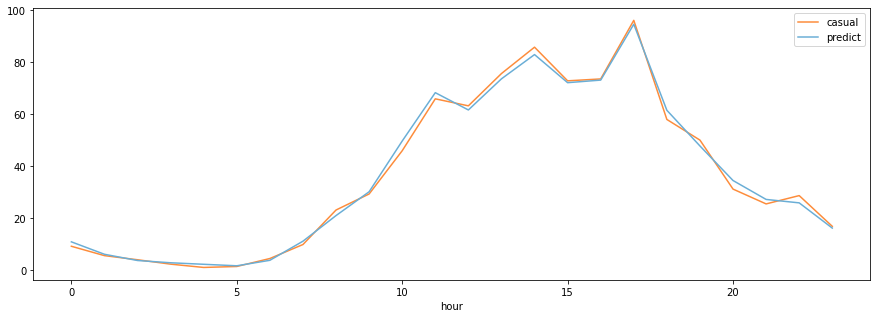

Fold:2
RMSLE: 0.5435039722788838
-4636.541902647096
4406.528219435886


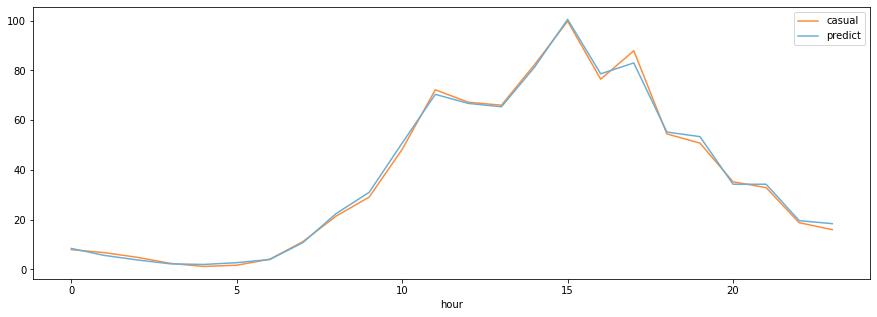

Fold:3
RMSLE: 0.5206856751706502
-3903.94718696764
4467.909468733106


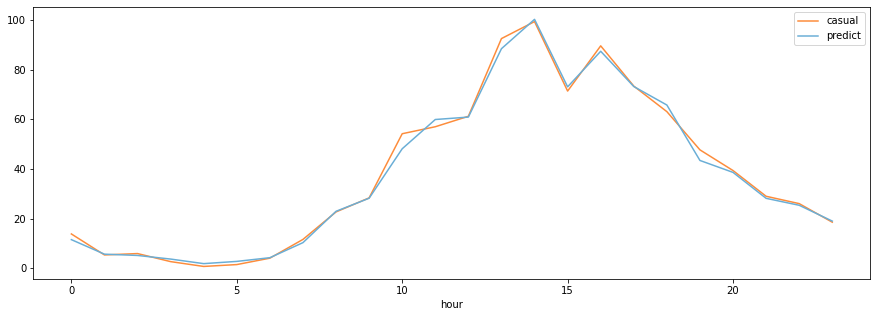

Fold:4
RMSLE: 0.5841225368222165
-3988.114662993159
4931.427839335239


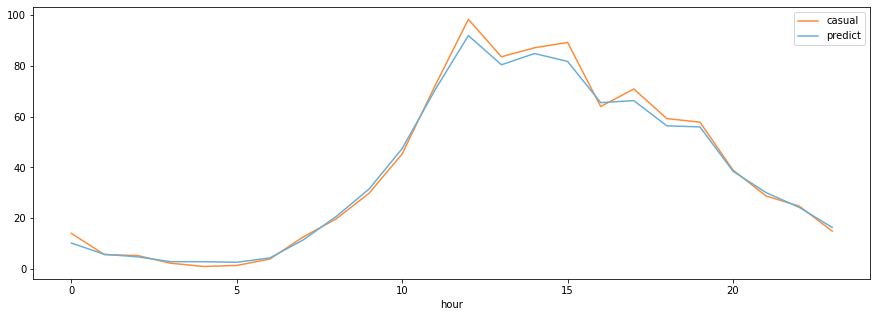

Fold:5
RMSLE: 0.542023519219042
-4319.258448620671
4344.414599853586


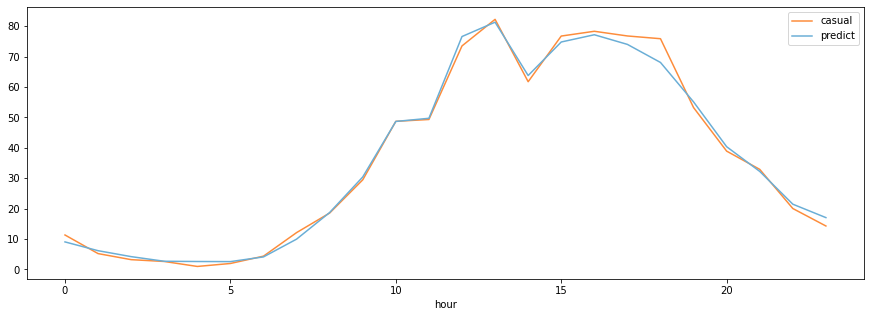

Fold:6
RMSLE: 0.5241993673438369
-4235.994518579621
3859.164196428809


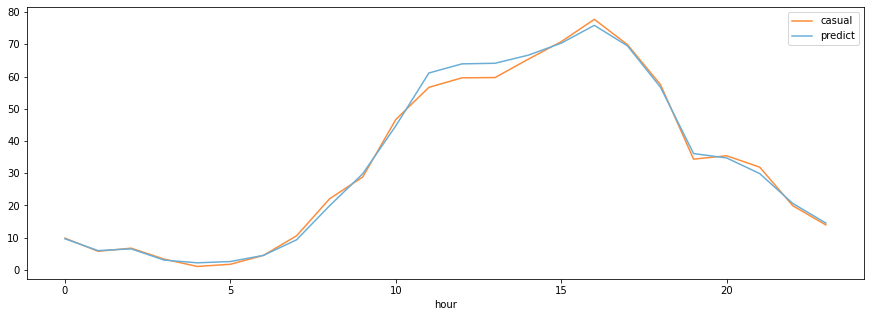

Fold:7
RMSLE: 0.5303400651162975
-4293.928919603837
3966.76028316041


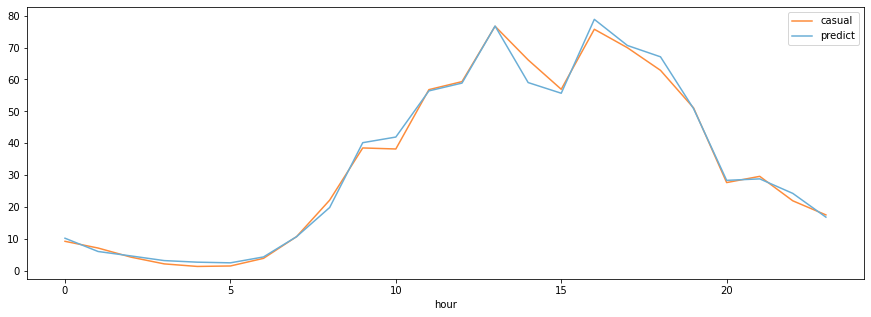

Fold:8
RMSLE: 0.5724120151393062
-4102.683274958168
4543.5221644816775


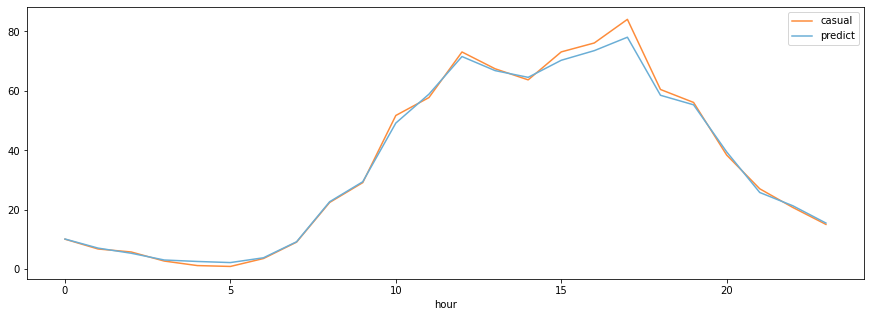

Fold:9
RMSLE: 0.5212150493151452
-4594.656832712255
4321.733268354545


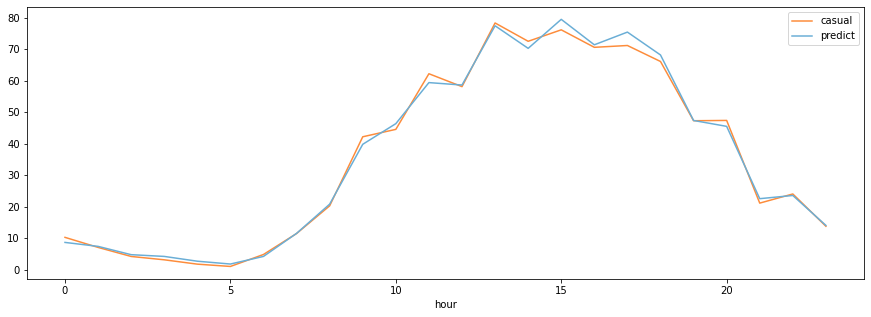

Fold:10
RMSLE: 0.5530475700397529
-4221.06184986761
3530.4135727398098


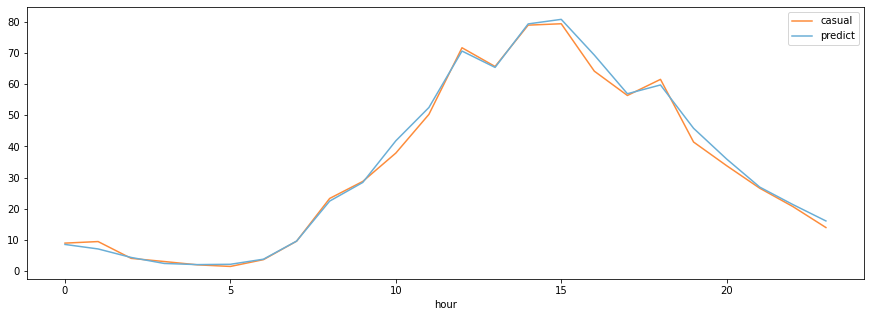

In [9]:
#casual
kf = KFold(n_splits=10, shuffle=True, random_state=1).split(train_0, train_casual)
kf_ = list(kf)

cnt = 0
sum = 0
for Ktrain, Ktest in kf_:
    cnt += 1
    model = lgb.LGBMRegressor()
    model.fit(train_0.loc[Ktrain],
              train_casual.loc[Ktrain],
              eval_set = [(train_0.loc[Ktest], train_casual.loc[Ktest])],
              eval_metric = 'rmsle',                         #rmsleがない
              verbose=0)
 
    y_pred = model.predict(train_0.loc[Ktest])
    y_pred[y_pred < 0] = 0                                    #負の値が出てしまった。
    
    print(f"Fold:{cnt}")
    print('RMSLE:', np.sqrt(mean_squared_log_error(train_casual.loc[Ktest], y_pred)))
    diff = train_casual.loc[Ktest] - y_pred
    print(diff[diff<0].sum())
    print(diff[diff>0].sum())
    
    true_df = train.loc[Ktest][['casual', 'hour']].groupby(['hour'], as_index = True).mean().sort_values(by = 'casual')
    
    trainhour = train_0.loc[Ktest]['hour'].reset_index()
    pred_df = pd.concat([trainhour['hour'], pd.Series(y_pred)], axis=1)
    pred_df.columns = ['hour','predict']
    pred_df = pred_df.groupby(['hour'], as_index = True).mean().sort_values(by = 'predict')
    
    fig = plt.figure(figsize=(15,5))
    sns.lineplot(data=true_df, palette='Oranges')
    sns.lineplot(data=pred_df, palette='Blues')
    plt.show()

Fold:1
RMSLE: 0.5281316699367777
-4046.5271623181134
5044.977142059184


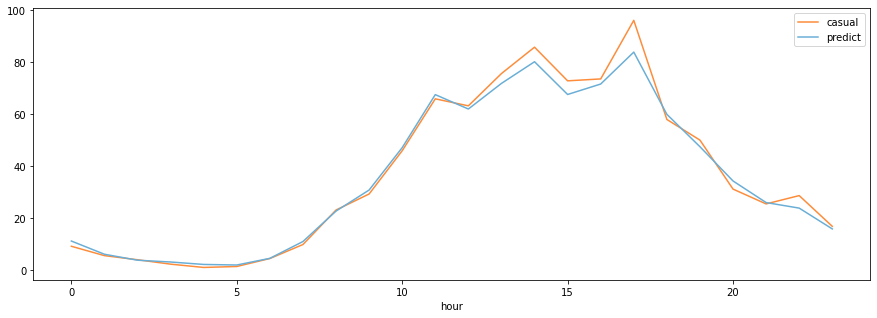

Fold:2
RMSLE: 0.518923116786227
-4212.185554832467
5145.914358441181


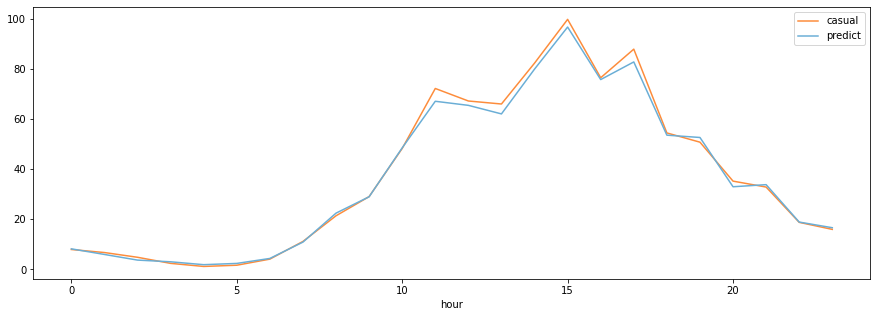

Fold:3
RMSLE: 0.5075790270250788
-3603.396059126113
5597.378384007538


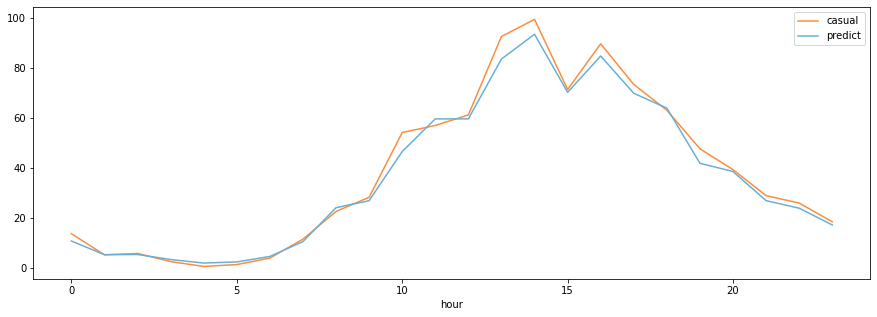

Fold:4
RMSLE: 0.5506260784353678
-3551.936324434804
5533.283860569459


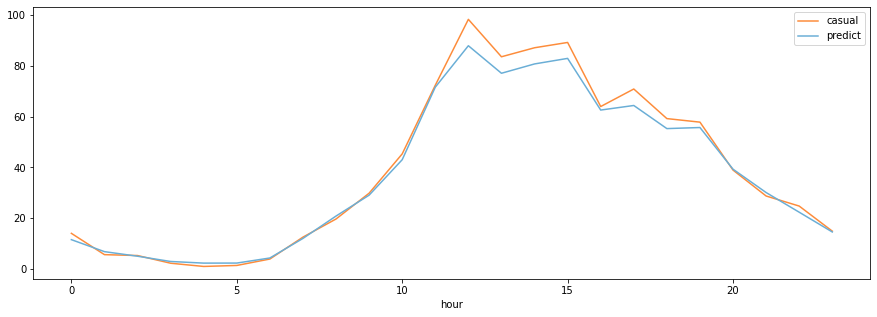

Fold:5
RMSLE: 0.5155740513535119
-3839.174301459725
5508.526618208013


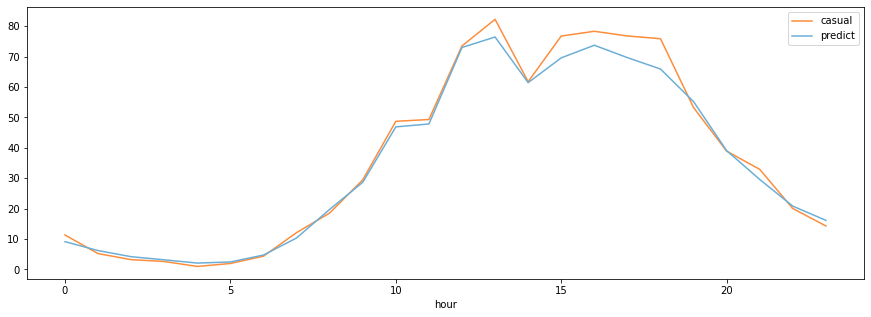

Fold:6
RMSLE: 0.4768766329998644
-3630.7936216949356
4527.388643816272


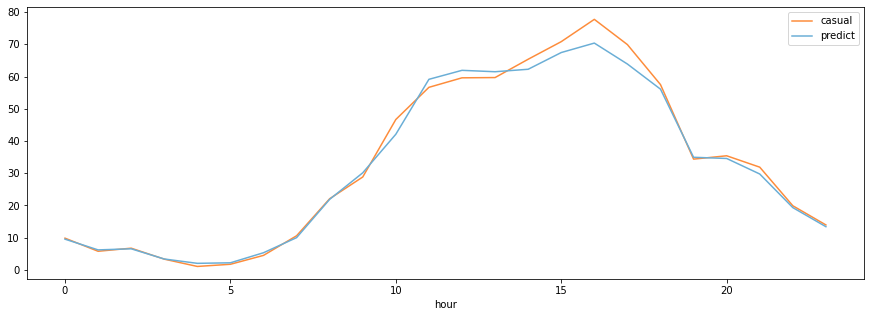

Fold:7
RMSLE: 0.5114262918363255
-4032.912055403447
4728.442774365311


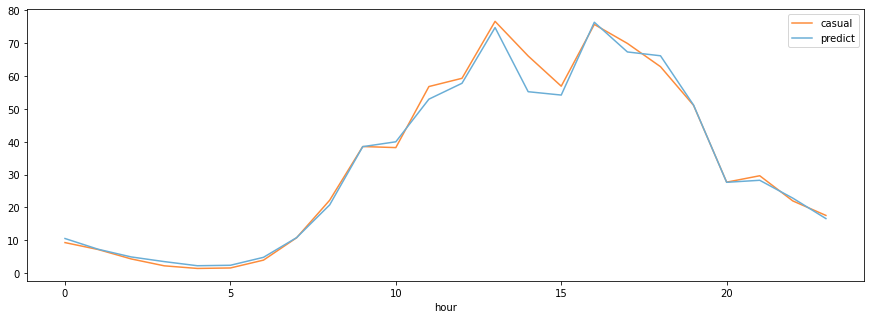

Fold:8
RMSLE: 0.5289958082034486
-3986.7914140925786
5357.17075995411


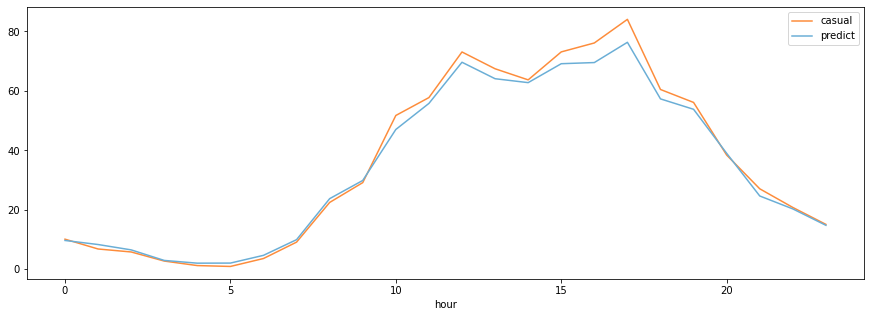

Fold:9
RMSLE: 0.516560741612624
-4173.056929649353
4994.214260163477


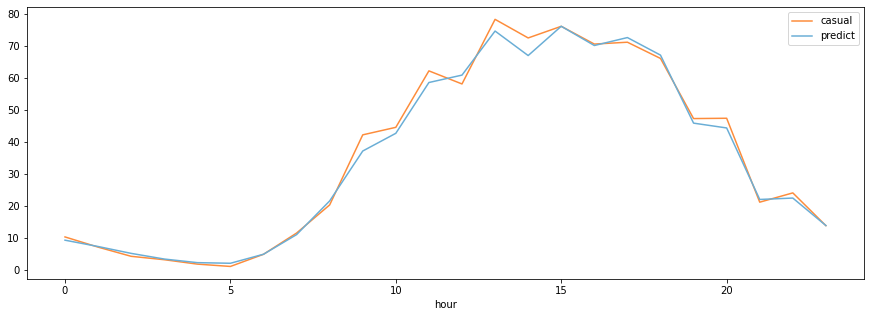

Fold:10
RMSLE: 0.5222638579819991
-3911.520487136351
3914.8507753308677


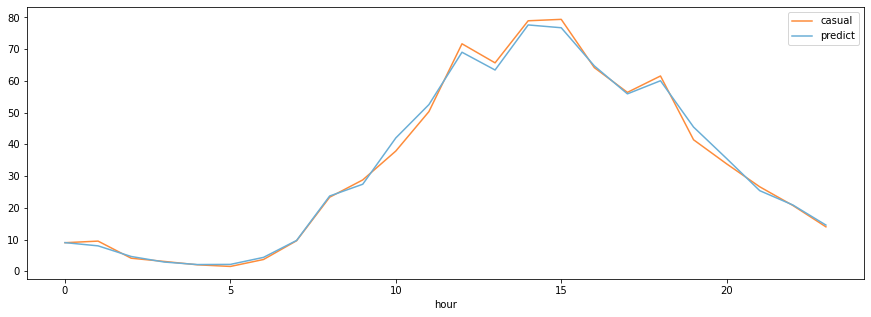

In [10]:
#casual log
kf = KFold(n_splits=10, shuffle=True, random_state=1).split(train_0, train_casual_log)
kf_ = list(kf)

cnt = 0
sum = 0
for Ktrain, Ktest in kf_:
    cnt += 1
    model = lgb.LGBMRegressor()
    model.fit(train_0.loc[Ktrain],
              train_casual_log.loc[Ktrain],
              eval_set = [(train_0.loc[Ktest], train_casual_log.loc[Ktest])],
              eval_metric = 'rmsle',                         
              verbose=0)
 
    y_pred_log = model.predict(train_0.loc[Ktest])
    y_pred = np.exp(y_pred_log) - 1
    #y_pred[y_pred < 0] = 0                                    
    
    print(f"Fold:{cnt}")
    print('RMSLE:', np.sqrt(mean_squared_log_error(train_casual.loc[Ktest], y_pred)))
    diff = train_casual.loc[Ktest] - y_pred
    print(diff[diff<0].sum())
    print(diff[diff>0].sum())
    
    true_df = train.loc[Ktest][['casual', 'hour']].groupby(['hour'], as_index = True).mean().sort_values(by = 'casual')
    
    trainhour = train_0.loc[Ktest]['hour'].reset_index()
    pred_df = pd.concat([trainhour['hour'], pd.Series(y_pred)], axis=1)
    pred_df.columns = ['hour','predict']
    pred_df = pred_df.groupby(['hour'], as_index = True).mean().sort_values(by = 'predict')
    
    fig = plt.figure(figsize=(15,5))
    sns.lineplot(data=true_df, palette='Oranges')
    sns.lineplot(data=pred_df, palette='Blues')
    plt.show()

Fold:1
RMSLE: 0.39546526503323165
-10044.4268237367
10624.871685577593


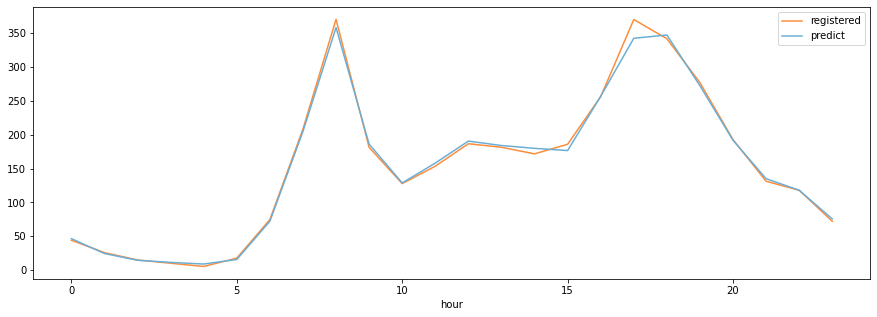

Fold:2
RMSLE: 0.37520890611984126
-10933.068031903553
9578.115014909969


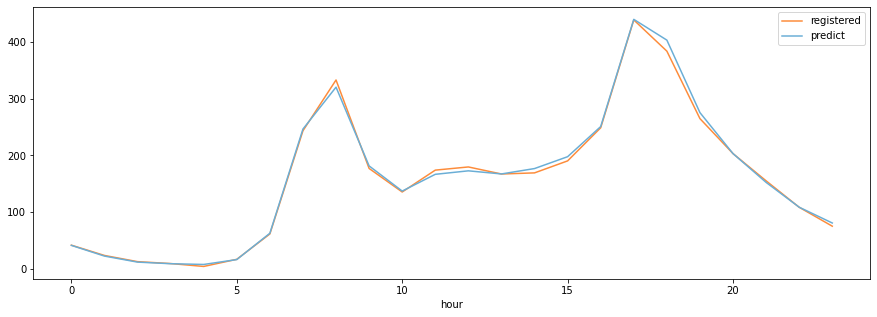

Fold:3
RMSLE: 0.3984314107761112
-9251.527959801388
10254.371500078196


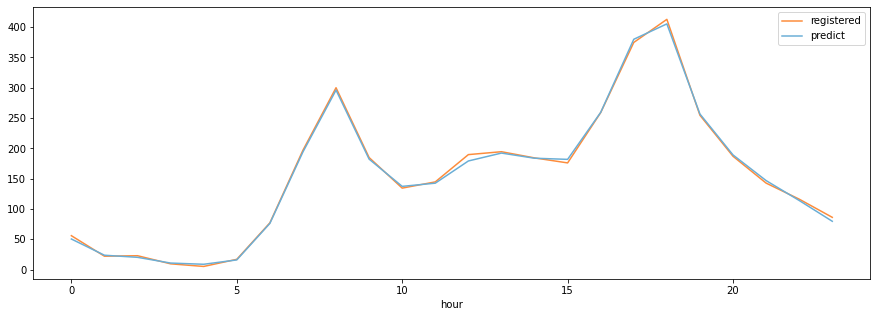

Fold:4
RMSLE: 0.4004727882222668
-10547.449107358938
10624.904727752435


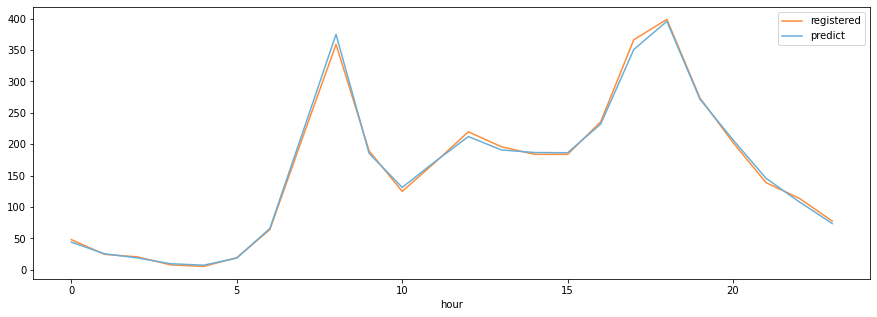

Fold:5
RMSLE: 0.4026633362198624
-10648.821168652223
10255.048681613258


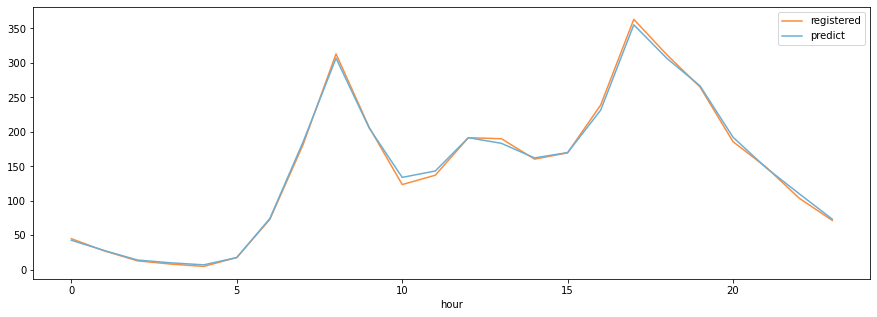

Fold:6
RMSLE: 0.3820730611794027
-11075.95951241424
10252.653330859175


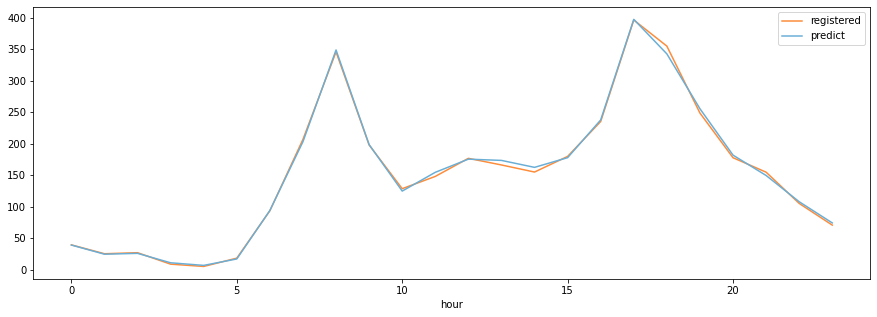

Fold:7
RMSLE: 0.3770108755496307
-10204.284942242211
9933.383635084427


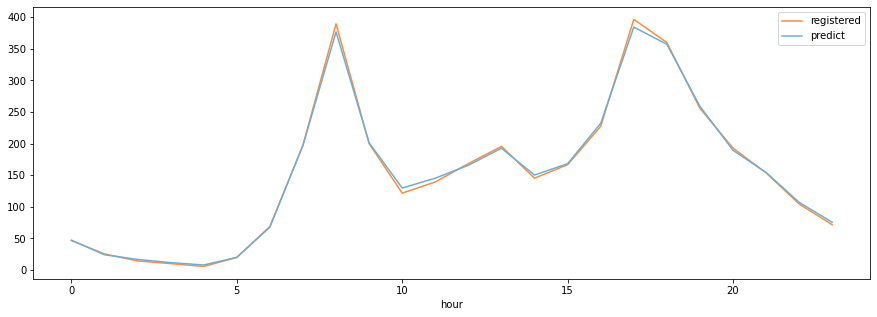

Fold:8
RMSLE: 0.38892539512990193
-9614.545181970361
10647.61184879313


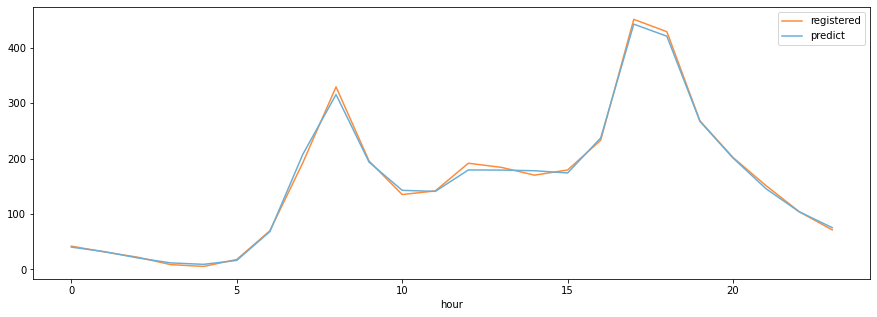

Fold:9
RMSLE: 0.39342740812799176
-11287.13289858828
10553.436610020988


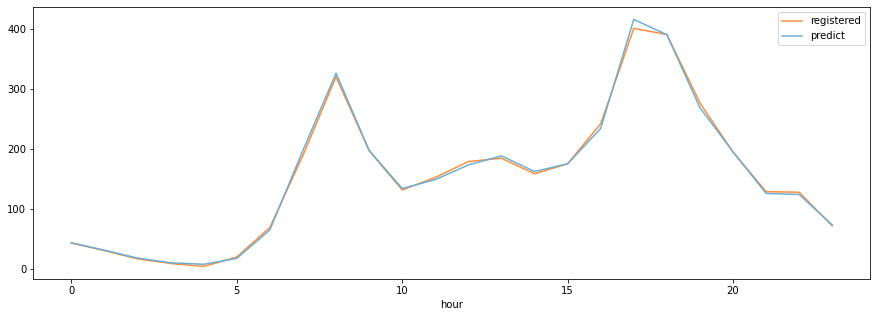

Fold:10
RMSLE: 0.4095278014291583
-9807.871728014255
9744.85626637589


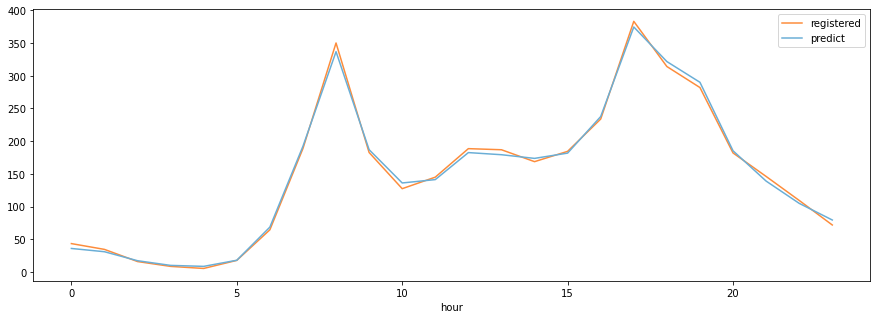

In [11]:
#registered
kf = KFold(n_splits=10, shuffle=True, random_state=1).split(train_0, train_regis)
kf_ = list(kf)

cnt = 0
sum = 0
for Ktrain, Ktest in kf_:
    cnt += 1
    model = lgb.LGBMRegressor()
    model.fit(train_0.loc[Ktrain],
              train_regis.loc[Ktrain],
              eval_set = [(train_0.loc[Ktest], train_regis.loc[Ktest])],
              eval_metric = 'rmsle',                         #rmsleがない
              verbose=0)
 
    y_pred = model.predict(train_0.loc[Ktest])
    y_pred[y_pred < 0] = 0                                    #負の値が出てしまった。
    
    print(f"Fold:{cnt}")
    print('RMSLE:', np.sqrt(mean_squared_log_error(train_regis.loc[Ktest], y_pred)))
    diff = train_regis.loc[Ktest] - y_pred
    print(diff[diff<0].sum())
    print(diff[diff>0].sum())
    
    true_df = train.loc[Ktest][['registered', 'hour']].groupby(['hour'], as_index = True).mean().sort_values(by = 'registered')
    
    trainhour = train_0.loc[Ktest]['hour'].reset_index()
    pred_df = pd.concat([trainhour['hour'], pd.Series(y_pred)], axis=1)
    pred_df.columns = ['hour','predict']
    pred_df = pred_df.groupby(['hour'], as_index = True).mean().sort_values(by = 'predict')
    
    fig = plt.figure(figsize=(15,5))
    sns.lineplot(data=true_df, palette='Oranges')
    sns.lineplot(data=pred_df, palette='Blues')
    plt.show()

Fold:1
RMSLE: 0.28439989504432556
-8942.92296130587
13550.455658853365


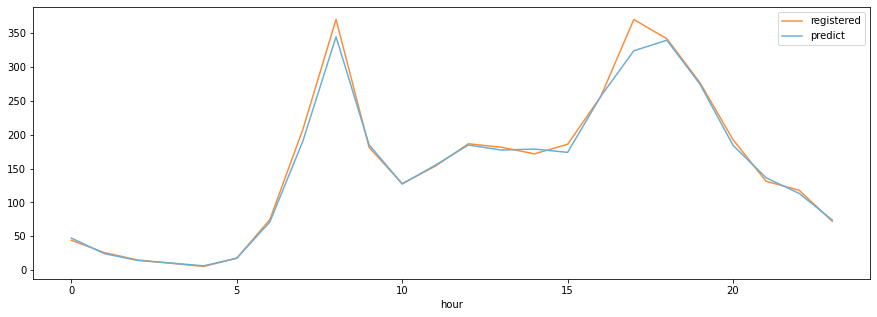

Fold:2
RMSLE: 0.2878807955131979
-9899.864239055454
10702.670099419107


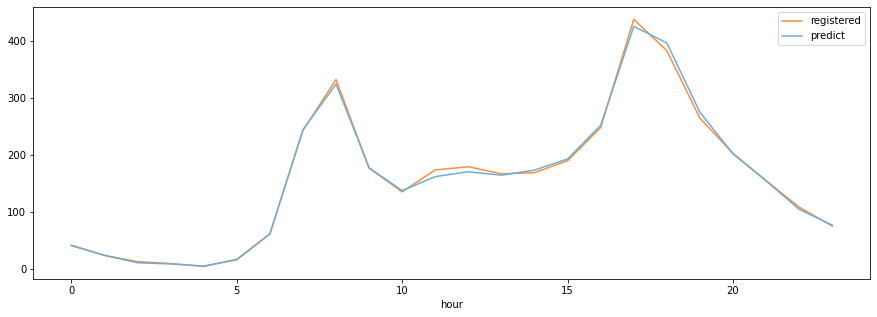

Fold:3
RMSLE: 0.2721447574515103
-8313.026151847636
12122.17536445609


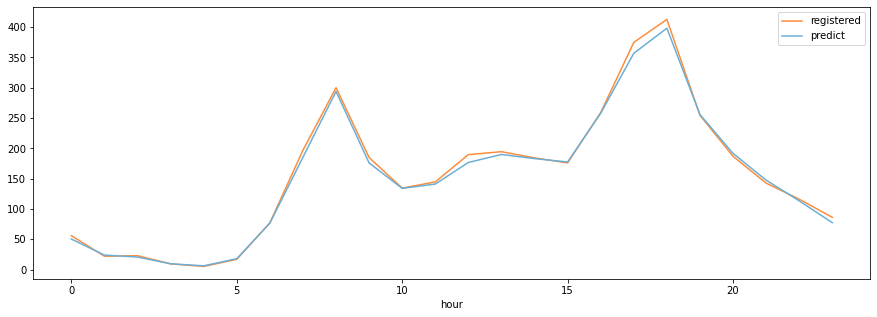

Fold:4
RMSLE: 0.3095859279322045
-9649.24858821357
13641.76858156811


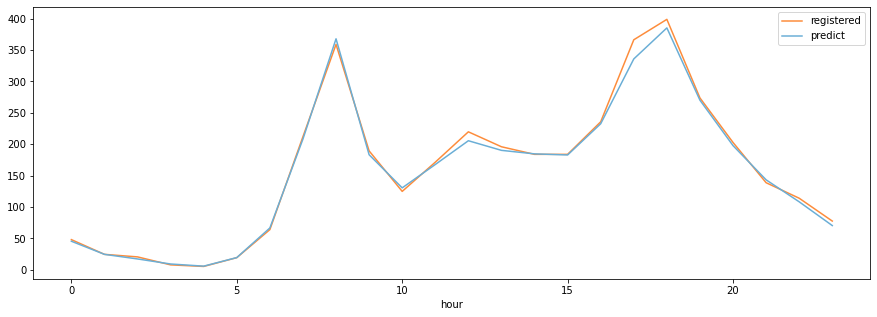

Fold:5
RMSLE: 0.2993959127127255
-8417.113556226857
12227.188876940168


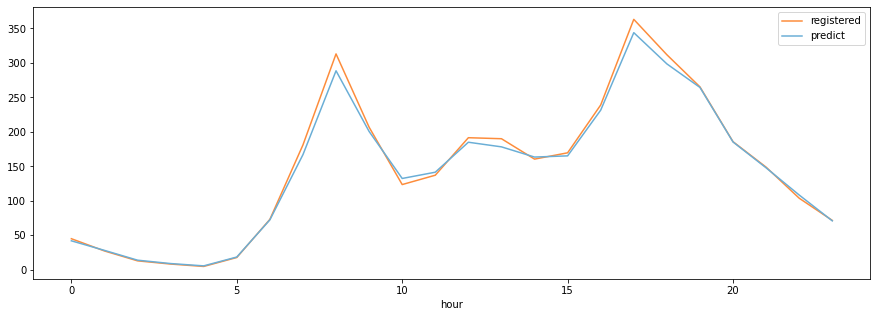

Fold:6
RMSLE: 0.2839013526848197
-9455.30205528122
12822.918385088455


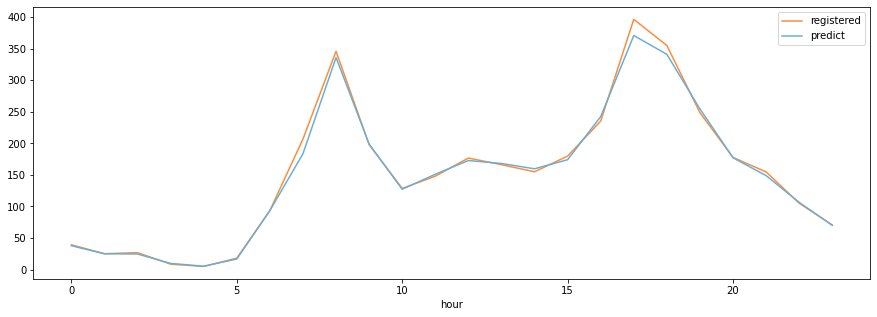

Fold:7
RMSLE: 0.2894523145047202
-9160.592150276463
13839.242255291914


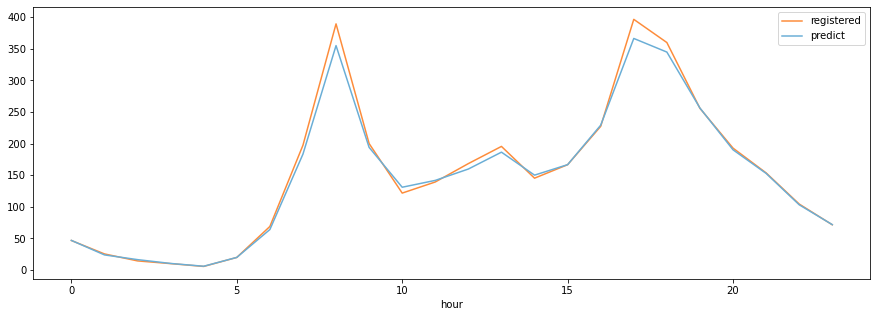

Fold:8
RMSLE: 0.28418475771207613
-8912.16543249668
12717.607093803275


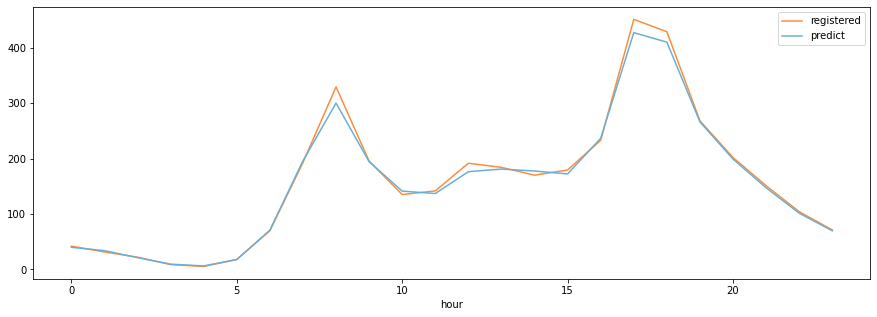

Fold:9
RMSLE: 0.29402001285124413
-9282.93573120683
12929.171725285527


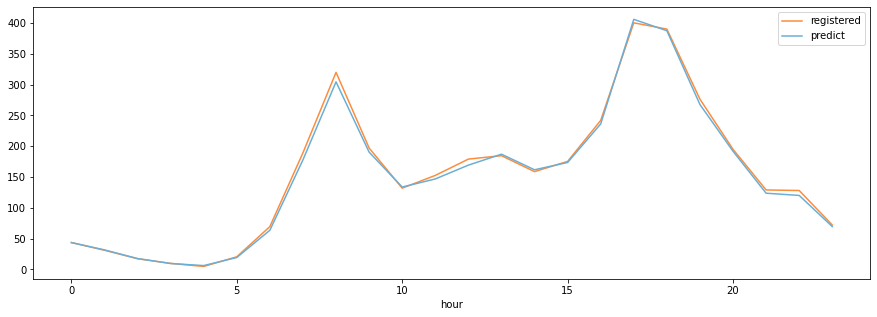

Fold:10
RMSLE: 0.3028408380245971
-8544.819216223645
11882.535725887403


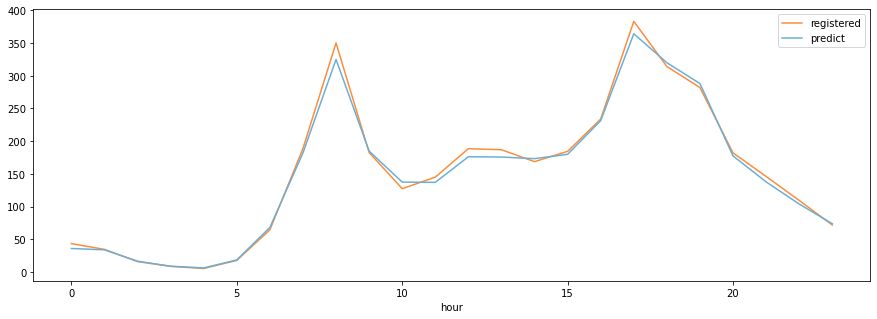

In [12]:
#registered log
kf = KFold(n_splits=10, shuffle=True, random_state=1).split(train_0, train_regis_log)
kf_ = list(kf)

cnt = 0
sum = 0
for Ktrain, Ktest in kf_:
    cnt += 1
    model = lgb.LGBMRegressor()
    model.fit(train_0.loc[Ktrain],
              train_regis_log.loc[Ktrain],
              eval_set = [(train_0.loc[Ktest], train_regis_log.loc[Ktest])],
              eval_metric = 'rmsle',                         
              verbose=0)
 
    y_pred_log = model.predict(train_0.loc[Ktest])
    y_pred = np.exp(y_pred_log) - 1
    #y_pred[y_pred < 0] = 0                                    
    
    print(f"Fold:{cnt}")
    print('RMSLE:', np.sqrt(mean_squared_log_error(train_regis.loc[Ktest], y_pred)))
    diff = train_regis.loc[Ktest] - y_pred
    print(diff[diff<0].sum())
    print(diff[diff>0].sum())
    
    true_df = train.loc[Ktest][['registered', 'hour']].groupby(['hour'], as_index = True).mean().sort_values(by = 'registered')
    
    trainhour = train_0.loc[Ktest]['hour'].reset_index()
    pred_df = pd.concat([trainhour['hour'], pd.Series(y_pred)], axis=1)
    pred_df.columns = ['hour','predict']
    pred_df = pred_df.groupby(['hour'], as_index = True).mean().sort_values(by = 'predict')
    
    fig = plt.figure(figsize=(15,5))
    sns.lineplot(data=true_df, palette='Oranges')
    sns.lineplot(data=pred_df, palette='Blues')
    plt.show()

In [13]:
#casual + registered
model = lgb.LGBMRegressor()
model.fit(train_0, train_casual)
y_pred_casual = model.predict(test_0)
y_pred_casual[y_pred_casual < 0] = 0  

model = lgb.LGBMRegressor()
model.fit(train_0, train_regis)
y_pred_regis = model.predict(test_0)
y_pred_regis[y_pred_regis < 0] = 0

y_pred_test = y_pred_casual + y_pred_regis

sub0 = pd.concat([test_datetime, pd.Series(y_pred_test)], axis=1)
sub0.columns = ['datetime','count']
sub0.to_csv('casuregi.csv', index = False)

#kaggle 0.491

In [15]:
#casual + registered log
model = lgb.LGBMRegressor()
model.fit(train_0, train_casual_log)
y_pred_casual = model.predict(test_0)
y_pred_casual_ = np.exp(y_pred_casual) - 1

model = lgb.LGBMRegressor()
model.fit(train_0, train_regis_log)
y_pred_regis = model.predict(test_0)
y_pred_regis_ = np.exp(y_pred_regis) - 1

y_pred_test = y_pred_casual_ + y_pred_regis_

sub0 = pd.concat([test_datetime, pd.Series(y_pred_test)], axis=1)
sub0.columns = ['datetime','count']
sub0.to_csv('casuregi_log.csv', index = False)

#kaggle 0.420

In [6]:
#提出用１
model = lgb.LGBMRegressor(silent = False,
                          n_jobs = -1,
                          max_depth = 10,
                          min_child_weight = 5,           #2,3,4,5
                          #gamma = 0.4                    #gammaの項がない
                          subsample = 0.9,
                          colsample_bytree = 1.0,
                          reg_alpha = 100,
                          n_estimators = 1000,
                          reg_lambda = 0.1,
                          learning_rate = 0.1
                          )
#model = lgb.LGBMRegressor()
model.fit(train_0, train_y)
y_pred_test = model.predict(test_0)
y_pred_test[y_pred_test < 0] = 0  
sub0 = pd.concat([test_datetime, pd.Series(y_pred_test)], axis=1)
sub0.columns = ['datetime','count']
sub0.to_csv('bikeLGBM.csv', index = False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 299
[LightGBM] [Info] Number of data points in the train set: 10886, number of used features: 13
[LightGBM] [Info] Start training from score 191.574132


In [7]:
#提出用２
model = lgb.LGBMRegressor()
model.fit(train_0, train_y_log)
y_pred_log = model.predict(test_0)
y_pred_test = np.exp(y_pred_log) - 1
sub0 = pd.concat([test_datetime, pd.Series(y_pred_test)], axis=1)
sub0.columns = ['datetime','count']
sub0.to_csv('bikeLGBM_log.csv', index = False)

In [18]:
y_pred_test.mean()

185.40692401575055

In [ ]:
0.551 default
0.547 paratyuu
0.407 count log

In [ ]:
RMSE(train data): 19.788
RMSLE(train data): 0.212
RMSE(test data): 41.599
RMSLE(test data): 0.308
xgboostより精度が悪かったが、台数の予測は実務的にはよくなったとみなしてよいかも
デフォルトと同じになってしまうので改善の余地はみられる。

In [ ]:
#https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html